<a href="https://colab.research.google.com/github/Thammawit/Dataset1/blob/master/Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moving Average

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#ดึง Library มาใช้

In [40]:
month = np.arange(1,14)    #สร้าง Data Set
df = pd.DataFrame(month,columns=['Month'])
df

,Month
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [41]:
from numpy.core.numeric import NaN
dataset = [10,12,11,13,14,13,16,15,13,14,16,13,NaN]
df['Demand']=dataset
df.info()
df
#pd.Series(data=dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   13 non-null     int64  
 1   Demand  12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 336.0 bytes


,Month,Demand
0,1,10.0
1,2,12.0
2,3,11.0
3,4,13.0
4,5,14.0
5,6,13.0
6,7,16.0
7,8,15.0
8,9,13.0
9,10,14.0


In [42]:
df.set_index('Month',inplace=True)
df

,Demand
Month,
1,10.0
2,12.0
3,11.0
4,13.0
5,14.0
6,13.0
7,16.0
8,15.0
9,13.0


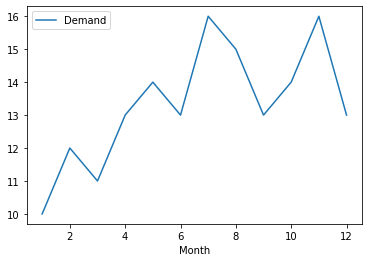

In [43]:
df.plot()

In [44]:
df.mean()

Demand    13.333333
dtype: float64

In [45]:
sma = df.rolling(window=3).mean()
df['SMA'] = sma.shift(1)
df

,Demand,SMA
Month,,
1,10.0,NaN
2,12.0,NaN
3,11.0,NaN
4,13.0,11.000000
5,14.0,12.000000
6,13.0,12.666667
7,16.0,13.333333
8,15.0,14.333333
9,13.0,14.666667


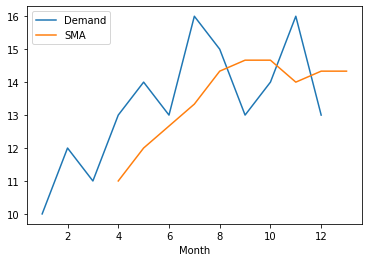

In [46]:
df.plot()

In [112]:
expo = df['Demand'].shift(1).ewm(alpha=0.5,adjust=False).mean()
df['Expo']=expo
df

,Demand,SMA,Expo,WMA
Month,,,,
1,10.0,NaN,NaN,NaN
2,12.0,NaN,10.000000,NaN
3,11.0,NaN,11.000000,NaN
4,13.0,11.000000,11.000000,10.6661
5,14.0,12.000000,12.000000,12.6661
6,13.0,12.666667,13.000000,12.9983
7,16.0,13.333333,13.000000,13.0000
8,15.0,14.333333,14.500000,15.3322
9,13.0,14.666667,14.750000,14.3322


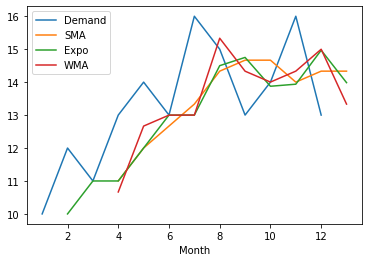

In [113]:
df.plot()

In [114]:
weights = np.array([0.3339, 0, 0.6661])
#sum_weights = np.sum(weights) กรณี บวกกันไม่เท่ากับ 1

df['WMA'] = df['Demand'].shift(1).rolling(window=3).apply(lambda x: np.sum(weights*x),raw=False)
#np.sum(weights*x)/sum_weights - กรณี บวกกันไม่เท่ากับ 1

df

,Demand,SMA,Expo,WMA
Month,,,,
1,10.0,NaN,NaN,NaN
2,12.0,NaN,10.000000,NaN
3,11.0,NaN,11.000000,NaN
4,13.0,11.000000,11.000000,10.6661
5,14.0,12.000000,12.000000,12.6661
6,13.0,12.666667,13.000000,12.9983
7,16.0,13.333333,13.000000,13.0000
8,15.0,14.333333,14.500000,15.3322
9,13.0,14.666667,14.750000,14.3322


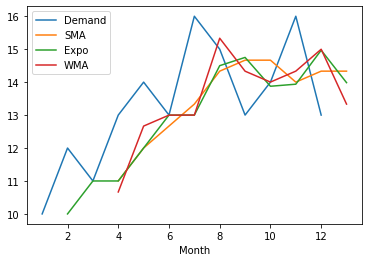

In [115]:
df.plot()

In [116]:
df.describe()  #เรียกดูรายละเอียด

,Demand,SMA,Expo,WMA
count,12.000000,10.000000,12.000000,10.000000
mean,13.333333,13.533333,13.001302,13.566270
std,1.825742,1.259041,1.645986,1.352087
min,10.000000,11.000000,10.000000,10.666100
25%,12.750000,12.833333,11.750000,12.998725
50%,13.000000,14.166667,13.437500,13.667800
75%,14.250000,14.333333,14.113281,14.333475
max,16.000000,14.666667,14.968750,15.332200


In [117]:
Y_true=df['Demand']
Y_pred_SMA=df['SMA']
MAD_SMA=abs(Y_true-Y_pred_SMA)
MAD_SMA


Month
1          NaN
2          NaN
3          NaN
4     2.000000
5     2.000000
6     0.333333
7     2.666667
8     0.666667
9     1.666667
10    0.666667
11    2.000000
12    1.333333
13         NaN
dtype: float64

In [71]:
print(MAD_SMA.mean())

1.4814814814814814


In [99]:
df['Demand'][0:12]

Month
1     10.0
2     12.0
3     11.0
4     13.0
5     14.0
6     13.0
7     16.0
8     15.0
9     13.0
10    14.0
11    16.0
12    13.0
Name: Demand, dtype: float64

In [119]:
from sklearn.metrics import mean_squared_error
Y_true=df['Demand'][1:12]
Y_pred_Expo=df['Expo'][1:12]
print("MSE_Expo =",mean_squared_error(Y_true,Y_pred_Expo))

MSE_Expo = 2.9507279829545454


In [120]:
Y_true=df['Demand'][4:12]
Y_pred_SMA=df['SMA'][4:12]
print("MSE_SMA =",mean_squared_error(Y_true,Y_pred_SMA))

MSE_SMA = 2.583333333333333


In [121]:
Y_true=df['Demand'][4:12]
Y_pred_WMA=df['WMA'][4:12]
print("MSE_WMA =",mean_squared_error(Y_true,Y_pred_WMA))

MSE_WMA = 2.4291875962500002


# Read from CSV
We can get data into colab in several fashions:
1.   from github
2.   from wget
3.   from local drive
4.   from google drive

In [72]:
#Method 1 read csv file from github 
#go to the github that hosts the file, and click 'view raw' and copy the URL.
url ='https://raw.githubusercontent.com/Thammawit/Dataset1/master/tutorials/Test_Data.csv'
df1 = pd.read_csv(url,header=None,names=['Month','Demand']) 
df1

,Month,Demand
0,1,10.0
1,2,12.0
2,3,11.0
3,4,13.0
4,5,14.0
5,6,13.0
6,7,16.0
7,8,15.0
8,9,13.0
9,10,14.0


In [73]:
#Method 2 use wget
#Explanation of /dev/null 2>&1 can be found here: https://stackoverflow.com/questions/10508843/what-is-dev-null-21
!wget -O Test_Data.csv https://raw.githubusercontent.com/Thammawit/Dataset1/master/tutorials/Test_Data.csv> /dev/null 2>&1
df2 = pd.read_csv('Test_Data.csv', header=None, names=['Month','Demand'])
df2

,Month,Demand
0,1,10.0
1,2,12.0
2,3,11.0
3,4,13.0
4,5,14.0
5,6,13.0
6,7,16.0
7,8,15.0
8,9,13.0
9,10,14.0


In [74]:
#Method 3 from local drive
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Test_Data.csv to Test_Data (1).csv
User uploaded file "Test_Data.csv" with length 80 bytes


In [75]:
df3 = pd.read_csv('Test_Data.csv', header=None, names=['Month','Demand'])
df3

,Month,Demand
0,1,10.0
1,2,12.0
2,3,11.0
3,4,13.0
4,5,14.0
5,6,13.0
6,7,16.0
7,8,15.0
8,9,13.0
9,10,14.0


In [76]:
#Method 4 from google drive (for large/many files)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
#once authorized, you can now navigate through your google drive files using the left navigation panel.
path = "/content/drive/MyDrive/Colab Notebooks/Test_Data.csv"
df4 = pd.read_csv(path,header=None, names=['Month','Demand'])
df4

,Month,Demand
0,1,10.0
1,2,12.0
2,3,11.0
3,4,13.0
4,5,14.0
5,6,13.0
6,7,16.0
7,8,15.0
8,9,13.0
9,10,14.0


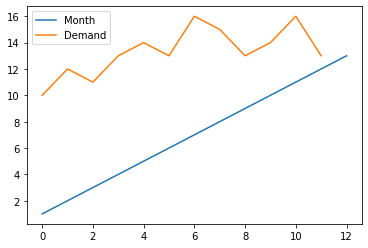

In [78]:
df4.plot()

In [79]:
df4.set_index('Month',inplace=True)
df4

,Demand
Month,
1,10.0
2,12.0
3,11.0
4,13.0
5,14.0
6,13.0
7,16.0
8,15.0
9,13.0


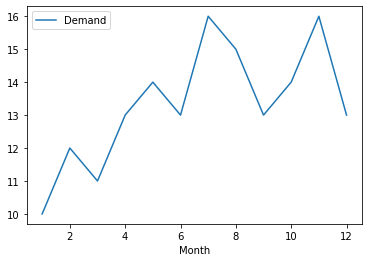

In [80]:
df4.plot()

In [81]:
sma = df4.rolling(window=3).mean()
df4['SMA'] = sma.shift(1)
df4

,Demand,SMA
Month,,
1,10.0,NaN
2,12.0,NaN
3,11.0,NaN
4,13.0,11.000000
5,14.0,12.000000
6,13.0,12.666667
7,16.0,13.333333
8,15.0,14.333333
9,13.0,14.666667
